In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data Load

In [2]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False}, style='white')

In [3]:
data = pd.read_csv('./customers_seg.csv', encoding = 'cp949')
data.head()

,CID,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
0,1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
1,2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
2,3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
3,4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
4,5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


# EDA

In [4]:
data.set_index('CID', inplace=True)
data.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [5]:
data.shape

(12000, 20)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   등록(계/피)                  12000 non-null  object 
 2   고용상태                     12000 non-null  object 
 3   성별                       12000 non-null  int64  
 4   Willingness to pay/Stay  12000 non-null  float64
 5   갱신                       12000 non-null  int64  
 6   상품타입                     12000 non-null  object 
 7   교육수준                     12000 non-null  object 
 8   소득                       12000 non-null  int64  
 9   지역                       12000 non-null  object 
 10  결혼여부                     12000 non-null  object 
 11  월 납입액                    12000 non-null  int64  
 12  VOC                      12000 non-null  int64  
 13  타 상품 보유 현황               12000 non-null  object 
 14  온라인방문빈도               

In [7]:
data.select_dtypes(include=['int','float']).describe()

,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


In [8]:
data.columns

Index(['AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신', '상품타입',
       '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황', '온라인방문빈도',
       '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [9]:
age = pd.crosstab(data['AGE'],columns='percentage', normalize=True)*100
age

col_0,percentage
AGE,
1,12.116667
2,12.816667
3,39.791667
4,26.033333
5,8.808333
6,0.433333


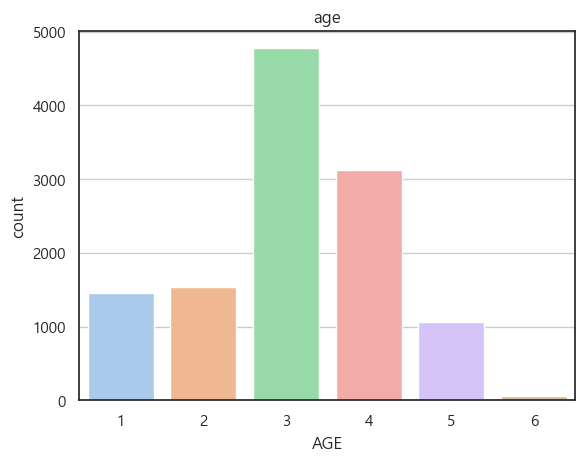

In [10]:
sns.countplot(x='AGE',data=data, palette='pastel')
plt.title('age')
plt.grid(axis='y')
plt.show()

In [11]:
pd.crosstab(data['고용상태'], columns='count')

col_0,count
고용상태,
FALSE,360
고용,7518
무직,3028
휴직,1094


In [12]:
pd.crosstab(data['고용상태'], columns='percentage', normalize=True) * 100

col_0,percentage
고용상태,
FALSE,3.000000
고용,62.650000
무직,25.233333
휴직,9.116667


In [13]:
data['고용상태'].isna().sum()

0

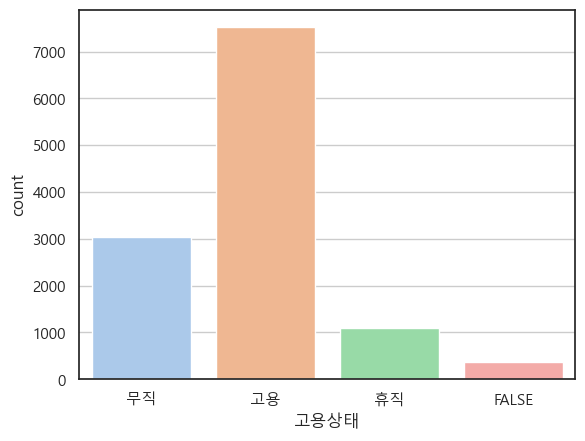

In [14]:
sns.countplot(x='고용상태',data=data, palette='pastel')
plt.grid(axis='y')
plt.show()

In [15]:
pd.crosstab(data['교육수준'], columns='count')

col_0,count
교육수준,
고졸이하,3477
대학졸업,7105
박사,439
석사,979


In [16]:
pd.crosstab(data['교육수준'], columns='percentage',normalize=True) * 100

col_0,percentage
교육수준,
고졸이하,28.975000
대학졸업,59.208333
박사,3.658333
석사,8.158333


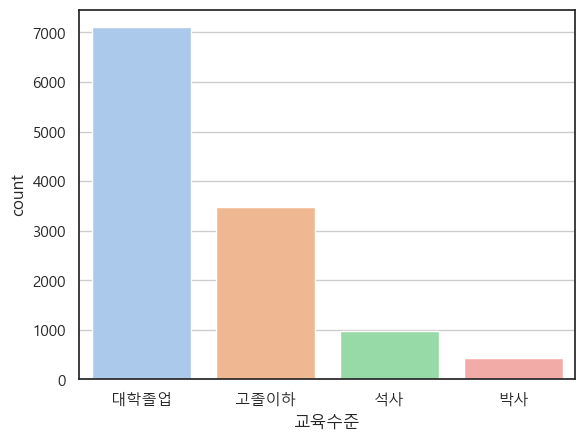

In [17]:
sns.countplot(x='교육수준',data=data, palette='pastel')
plt.grid(axis='y')
plt.show()

In [18]:
pd.crosstab(data['상품타입'], columns = 'percentage', normalize = True) * 100

col_0,percentage
상품타입,
고급,8.958333
기본,60.650000
중급,30.391667


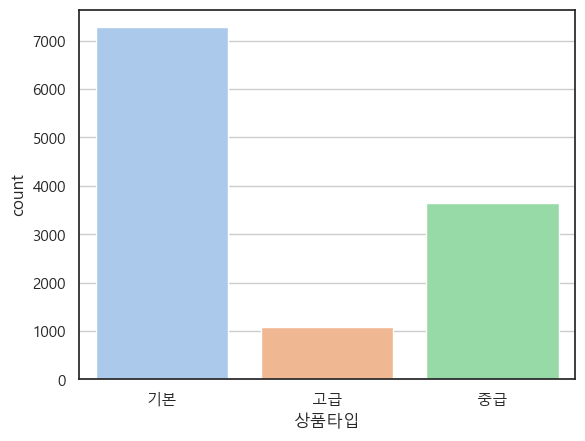

In [19]:
sns.countplot(x='상품타입', data=data, palette='pastel')
plt.grid(axis='y')
plt.show()

In [20]:
pd.crosstab(data['거주지사이즈'], columns='percentage', normalize=True) * 100

col_0,percentage
거주지사이즈,
대,10.375000
소,19.433333
중,70.191667


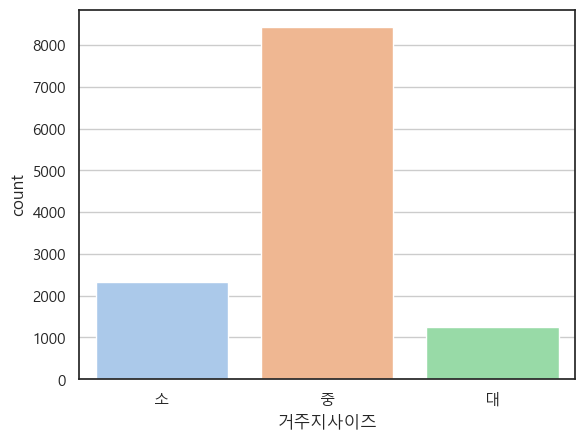

In [21]:
sns.countplot(x='거주지사이즈', data=data, palette='pastel')
plt.grid(axis='y')
plt.show()

In [22]:
pd.crosstab(data['자동차'], columns = 'percentage', normalize=True) * 100

col_0,percentage
자동차,
SUV,19.466667
고급차,3.783333
스포츠카,5.433333
일반세단,50.616667
컴팩트카,20.700000


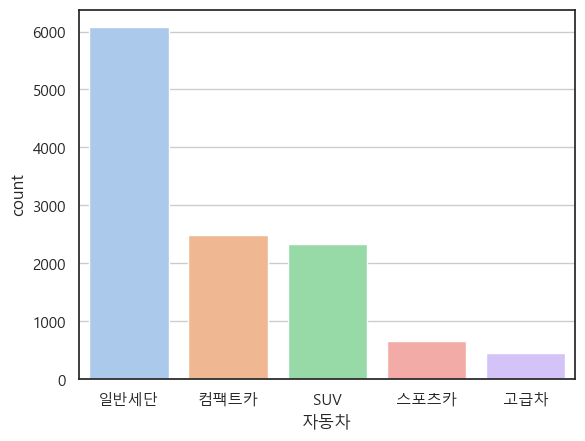

In [23]:
sns.countplot(x='자동차', data=data, palette='pastel')
plt.grid(axis='y')
plt.show()

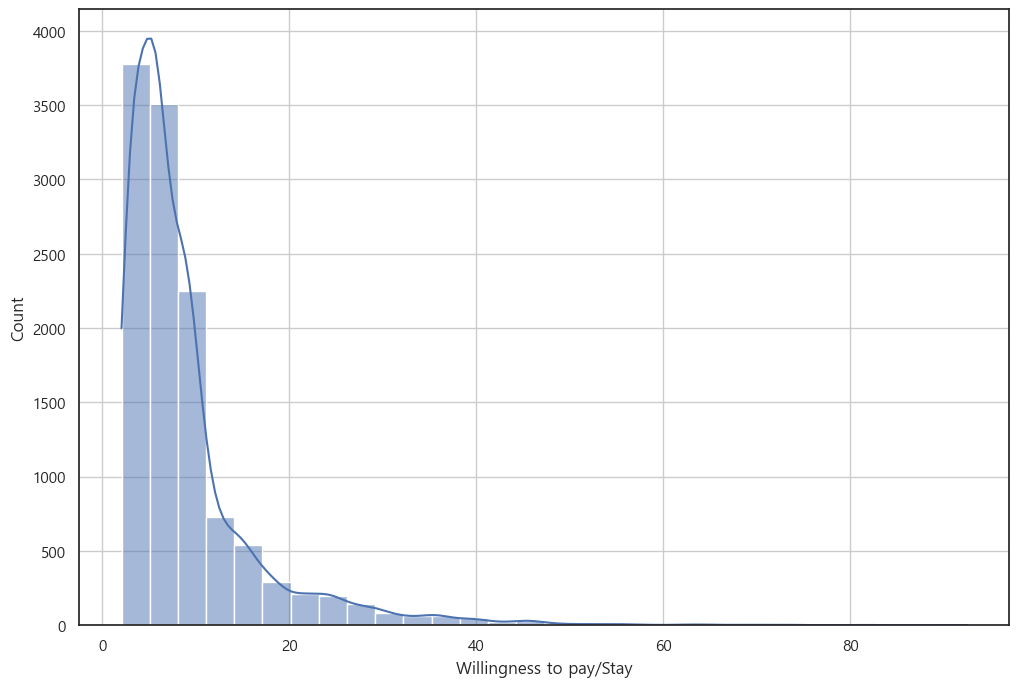

In [24]:
plt.figure(figsize=(12,8))

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

In [25]:
data.describe()

,AGE,성별,Willingness to pay/Stay,갱신,소득,월 납입액,VOC,총지불금액
count,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,12000.000000,1.200000e+04
mean,3.079000,0.487583,8.859478,0.143000,4.641737e+07,100.065833,0.390167,5.355854e+05
std,1.121768,0.499867,7.698885,0.350087,3.736221e+07,42.453750,0.919605,3.587993e+05
min,1.000000,0.000000,2.045730,0.000000,0.000000e+00,60.000000,0.000000,0.000000e+00
25%,3.000000,0.000000,4.373400,0.000000,0.000000e+00,70.000000,0.000000,3.360000e+05
50%,3.000000,0.000000,6.384831,0.000000,4.186240e+07,90.000000,0.000000,4.740000e+05
75%,4.000000,1.000000,9.867900,0.000000,7.664150e+07,120.000000,0.000000,6.790000e+05
max,6.000000,1.000000,92.496300,1.000000,1.320209e+08,350.000000,5.000000,3.573000e+06


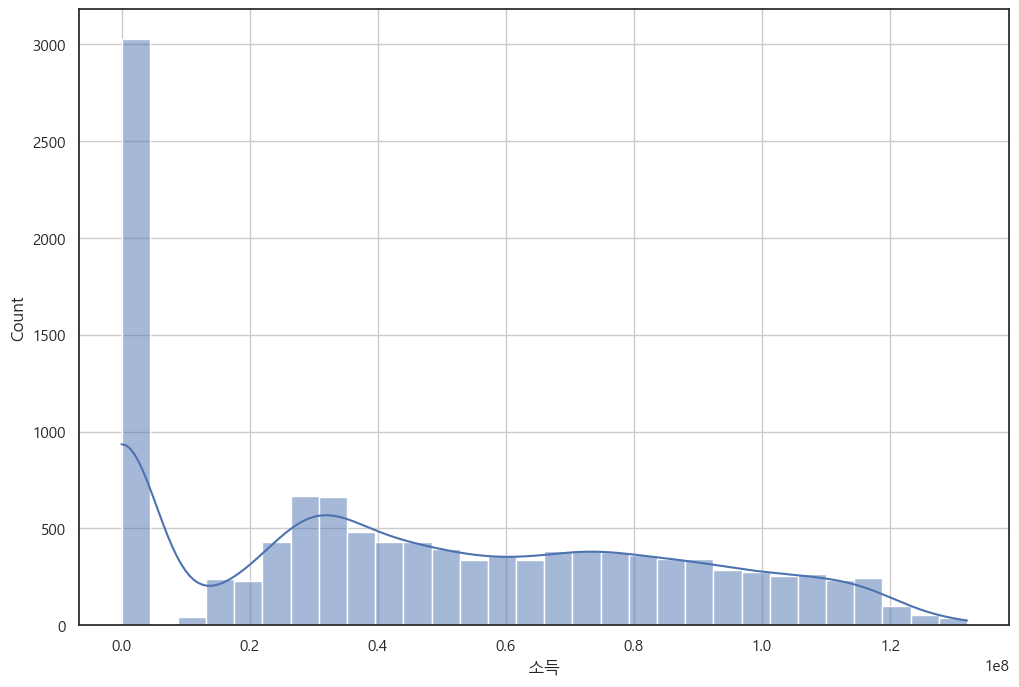

In [26]:
plt.figure(figsize=(12,8))

sns.histplot(data['소득'], bins=30, kde=True)
plt.grid()
plt.show()

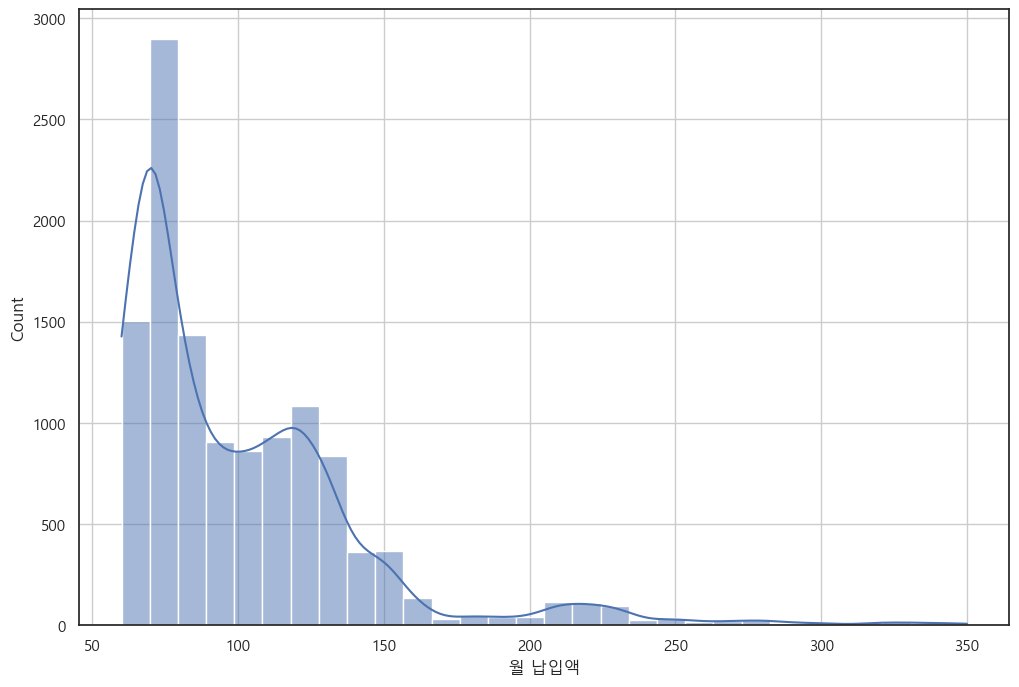

In [27]:
plt.figure(figsize=(12,8))

sns.histplot(data['월 납입액'],bins=30,kde=True)
plt.grid()
plt.show()

In [28]:
data['월 납입액'].describe()

count    12000.000000
mean       100.065833
std         42.453750
min         60.000000
25%         70.000000
50%         90.000000
75%        120.000000
max        350.000000
Name: 월 납입액, dtype: float64

In [29]:
pd.crosstab(data['타 상품 보유 현황'], columns = 'percentage', normalize = True) * 100

col_0,percentage
타 상품 보유 현황,
1,35.691667
2,25.141667
3,12.875000
4이상,26.291667


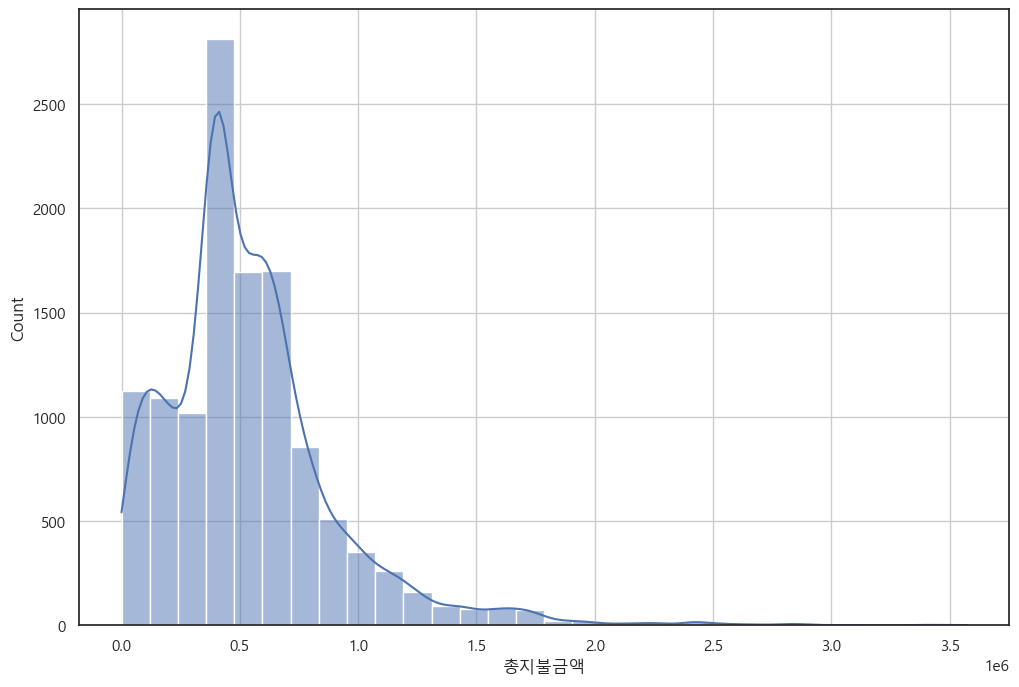

In [30]:
plt.figure(figsize=(12,8))

sns.histplot(data['총지불금액'], bins=30, kde=True)
plt.grid()
plt.show()

In [31]:
data['총지불금액'].describe()

count    1.200000e+04
mean     5.355854e+05
std      3.587993e+05
min      0.000000e+00
25%      3.360000e+05
50%      4.740000e+05
75%      6.790000e+05
max      3.573000e+06
Name: 총지불금액, dtype: float64

# Data Preprocessing

In [32]:
data.columns

Index(['AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신', '상품타입',
       '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황', '온라인방문빈도',
       '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

In [33]:
data_choice = data.copy()

cols = ['AGE', '고용상태', 'Willingness to pay/Stay', '상품타입', '교육수준', '소득', '월 납입액','타 상품 보유 현황', '총지불금액', '거주지사이즈','자동차']

data_choice = data_choice[cols]
data_choice

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,무직,2.616381,기본,대학졸업,0,80,1,631000,소,일반세단
2,1,고용,6.352530,기본,고졸이하,102887400,80,4이상,54000,중,일반세단
3,2,휴직,4.974354,기본,대학졸업,22159500,60,4이상,362000,중,일반세단
4,5,고용,13.480284,고급,고졸이하,51562500,110,2,1264000,대,컴팩트카
5,4,고용,9.776436,기본,석사,26820200,120,3,947000,중,SUV
...,...,...,...,...,...,...,...,...,...,...,...
11996,1,고용,25.985100,기본,대학졸업,86451000,70,2,245000,중,일반세단
11997,3,고용,3.441000,중급,대학졸업,25962000,80,1,468000,중,일반세단
11998,3,무직,9.057600,중급,대학졸업,0,90,2,977000,중,일반세단


## Categorical Variable Encoding

In [34]:
data_choice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


In [35]:
pd.crosstab(data_choice['고용상태'], columns='count')

col_0,count
고용상태,
FALSE,360
고용,7518
무직,3028
휴직,1094


In [36]:
data_choice.loc[data_choice['고용상태'].isin(['FALSE','무직','휴직']),'고용상태']=0
data_choice.loc[data_choice['고용상태'] == '고용','고용상태']=1

pd.crosstab(data_choice['고용상태'], columns='count')

col_0,count
고용상태,
0,4482
1,7518


In [37]:
pd.crosstab(data_choice['상품타입'], columns='percentage', normalize=True) * 100

col_0,percentage
상품타입,
고급,8.958333
기본,60.650000
중급,30.391667


In [38]:
data_choice.loc[data_choice['상품타입'].isin(['기본','중급']), '상품타입'] = 0
data_choice.loc[data_choice['상품타입']=='고급', '상품타입'] = 1

pd.crosstab(data_choice['상품타입'], columns='percentage', normalize=True) * 100

col_0,percentage
상품타입,
0,91.041667
1,8.958333


In [39]:
pd.crosstab(data_choice['교육수준'], columns='percentage', normalize=True) * 100

col_0,percentage
교육수준,
고졸이하,28.975000
대학졸업,59.208333
박사,3.658333
석사,8.158333


In [40]:
data_choice.loc[data['교육수준'].isin(['고졸이하','대학졸업']), '교육수준'] = 0
data_choice.loc[data['교육수준'].isin(['석사','박사']), '교육수준'] = 1

pd.crosstab(data_choice['교육수준'], columns='percentage', normalize=True) * 100

col_0,percentage
교육수준,
0,88.183333
1,11.816667


In [41]:
pd.crosstab(data_choice['타 상품 보유 현황'], columns='percentage', normalize=True) * 100

col_0,percentage
타 상품 보유 현황,
1,35.691667
2,25.141667
3,12.875000
4이상,26.291667


In [42]:
data_choice['타 상품 보유 현황'].replace('4이상', '4', inplace=True)

pd.crosstab(data_choice['타 상품 보유 현황'], columns='percentage', normalize=True) * 100

col_0,percentage
타 상품 보유 현황,
1,35.691667
2,25.141667
3,12.875000
4,26.291667


In [43]:
pd.crosstab(data_choice['거주지사이즈'], columns='percentage', normalize=True) * 100

col_0,percentage
거주지사이즈,
대,10.375000
소,19.433333
중,70.191667


In [44]:
data_choice.loc[data_choice['거주지사이즈'].isin(['중','소']), '거주지사이즈'] = 0
data_choice.loc[data_choice['거주지사이즈'] =='대', '거주지사이즈'] = 1

pd.crosstab(data_choice['거주지사이즈'], columns='percentage', normalize=True) * 100

col_0,percentage
거주지사이즈,
0,89.625
1,10.375


In [45]:
pd.crosstab(data_choice['자동차'], columns='percentage', normalize=True) * 100

col_0,percentage
자동차,
SUV,19.466667
고급차,3.783333
스포츠카,5.433333
일반세단,50.616667
컴팩트카,20.700000


In [46]:
data_choice.loc[data_choice['자동차'].isin(['일반세단','컴팩트카','SUV']), '자동차'] = 0
data_choice.loc[data_choice['자동차'].isin(['고급차','스포츠카']), '자동차'] = 1

pd.crosstab(data_choice['자동차'], columns='percentage', normalize=True) * 100

col_0,percentage
자동차,
0,90.783333
1,9.216667


## Outlier Handling

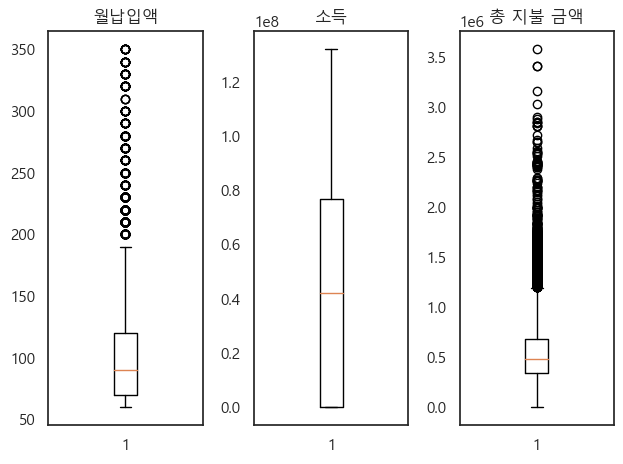

In [47]:
# boxplot으로 이상치 확인

plt.subplot(1,3,1)
plt.boxplot(data_choice['월 납입액'])
plt.title('월납입액')

plt.subplot(1,3,2)
plt.boxplot(data_choice['소득'])
plt.title('소득')

plt.subplot(1,3,3)
plt.boxplot(data_choice['총지불금액'])
plt.title('총 지불 금액')

plt.tight_layout()
plt.show()

In [48]:
# z-score 컬럼 생성
# z(소득) = x(소득) - mean(소득) / std(소득)

data_choice['소득_z'] = (data_choice['소득'] - np.mean(data_choice['소득'])) / np.std(data_choice['소득'])
data_choice['소득_z']

CID
1       -1.242413
2        1.511484
3       -0.649289
4        0.137715
5       -0.524540
           ...   
11996    1.071545
11997   -0.547511
11998   -1.242413
11999   -0.536698
12000   -1.242413
Name: 소득_z, Length: 12000, dtype: float64

In [49]:
data_choice['월 납입액_z'] = (data_choice['월 납입액'] - np.mean(data_choice['월 납입액'])) / np.std(data_choice['월 납입액'])
data_choice['총지불금액_z'] = (data_choice['총지불금액'] - np.mean(data_choice['총지불금액'])) / np.std(data_choice['총지불금액'])

In [50]:
data_choice[['소득_z','월 납입액_z','총지불금액_z']].describe()

,소득_z,월 납입액_z,총지불금액_z
count,1.200000e+04,1.200000e+04,1.200000e+04
mean,-5.447494e-17,5.935992e-17,1.136868e-16
std,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.242413e+00,-9.437918e-01,-1.492778e+00
25%,-1.242413e+00,-7.082316e-01,-5.562824e-01
50%,-1.219190e-01,-2.371110e-01,-1.716502e-01
75%,8.089829e-01,4.695698e-01,3.997236e-01
max,2.291275e+00,5.887456e+00,8.465851e+00


In [51]:
# z-score가 3 이상이거나 -3 이하일 경우 이상치로 판단

print("월 납입액 이상치 최솟값:",np.min(data_choice[(abs(data_choice['월 납입액_z'])>=3)]['월 납입액']))
print('소득 이상치 최솟값:',np.min(data_choice[(abs(data_choice['소득_z'])>=3)]['소득']))
print('총 지불 금액 이상치 최솟값:', np.min(data_choice[abs(data_choice['총지불금액_z'] >= 3)]['총지불금액']))

월 납입액 이상치 최솟값: 230
소득 이상치 최솟값: nan
총 지불 금액 이상치 최솟값: 1612000


In [52]:
# 이상치 대체

data_choice.loc[data_choice['월 납입액']>=230, '월 납입액'] =230
data_choice.loc[data_choice['총지불금액']>=1612000, '총지불금액'] =1612000

# 소득 이상치는 없지만, 소득이 없는 고객이 많았기에 이산화 처리
data_choice.loc[data_choice['소득'] == 0, '소득'] = 0
data_choice.loc[data_choice['소득'] > 0, '소득'] = 1

In [53]:
data_choice_n = data_choice.drop(['소득_z','월 납입액_z','총지불금액_z'], axis=1)
data_choice_n.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
CID,,,,,,,,,,,
1,3,0,2.616381,0,0,0,80,1,631000,0,0
2,1,1,6.352530,0,0,1,80,4,54000,0,0
3,2,0,4.974354,0,0,1,60,4,362000,0,0
4,5,1,13.480284,1,0,1,110,2,1264000,1,0
5,4,1,9.776436,0,1,1,120,3,947000,0,0


In [54]:
data_choice_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  int64  
 1   고용상태                     12000 non-null  object 
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  object 
 4   교육수준                     12000 non-null  object 
 5   소득                       12000 non-null  int64  
 6   월 납입액                    12000 non-null  int64  
 7   타 상품 보유 현황               12000 non-null  object 
 8   총지불금액                    12000 non-null  int64  
 9   거주지사이즈                   12000 non-null  object 
 10  자동차                      12000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.1+ MB


In [55]:
# 자료형 변환

data_choice_n = data_choice_n.astype('float64')
data_choice_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      12000 non-null  float64
 1   고용상태                     12000 non-null  float64
 2   Willingness to pay/Stay  12000 non-null  float64
 3   상품타입                     12000 non-null  float64
 4   교육수준                     12000 non-null  float64
 5   소득                       12000 non-null  float64
 6   월 납입액                    12000 non-null  float64
 7   타 상품 보유 현황               12000 non-null  float64
 8   총지불금액                    12000 non-null  float64
 9   거주지사이즈                   12000 non-null  float64
 10  자동차                      12000 non-null  float64
dtypes: float64(11)
memory usage: 1.1 MB


## Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler_data = scaler.fit_transform(data_choice_n)

scaler_data = pd.DataFrame(scaler_data)
scaler_data.columns = data_choice_n.columns

In [57]:
scaler_data.head()

,AGE,고용상태,Willingness to pay/Stay,상품타입,교육수준,소득,월 납입액,타 상품 보유 현황,총지불금액,거주지사이즈,자동차
0,0.4,0.0,0.006309,0.0,0.0,0.0,0.117647,0.000000,0.391439,0.0,0.0
1,0.0,1.0,0.047615,0.0,0.0,1.0,0.117647,1.000000,0.033499,0.0,0.0
2,0.2,0.0,0.032378,0.0,0.0,1.0,0.000000,1.000000,0.224566,0.0,0.0
3,0.8,1.0,0.126418,1.0,0.0,1.0,0.294118,0.333333,0.784119,1.0,0.0
4,0.6,1.0,0.085469,0.0,1.0,1.0,0.352941,0.666667,0.587469,0.0,0.0


In [58]:
scaler_data.to_csv('scaler_data.csv', index=False)

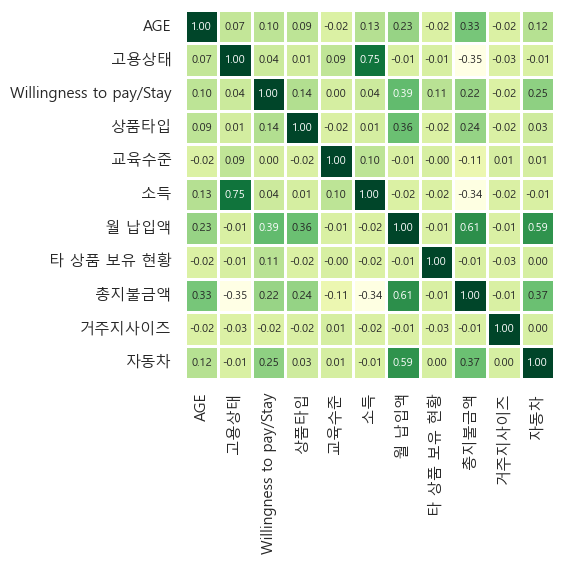

In [59]:
sns.heatmap(pd.read_csv('scaler_data.csv').corr(),
            annot=True,
            annot_kws={'size':8},
            cbar=False, 
            fmt='.2f', 
            cmap='YlGn',
            square=True, 
            linewidths=1)
plt.show()

# Modeling

In [60]:
data = pd.read_csv('./scaler_data.csv', encoding = 'utf-8')

In [61]:
!pip install yellowbrick

In [62]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

CPU times: total: 2.3 s
Wall time: 239 ms
n_cluster:3, inertia:8000.0474843295215
---------
CPU times: total: 2.47 s
Wall time: 241 ms
n_cluster:4, inertia:6999.594798161761
---------
CPU times: total: 2.25 s
Wall time: 256 ms
n_cluster:5, inertia:6242.453008714729
---------
CPU times: total: 2.38 s
Wall time: 259 ms
n_cluster:6, inertia:5553.295907301486
---------
CPU times: total: 2.75 s
Wall time: 263 ms
n_cluster:7, inertia:5052.01923002428
---------
CPU times: total: 2.41 s
Wall time: 280 ms
n_cluster:8, inertia:4625.5226500514145
---------
CPU times: total: 2.78 s
Wall time: 275 ms
n_cluster:9, inertia:4222.4229503857905
---------
CPU times: total: 2.89 s
Wall time: 275 ms
n_cluster:10, inertia:3918.650650451255
---------


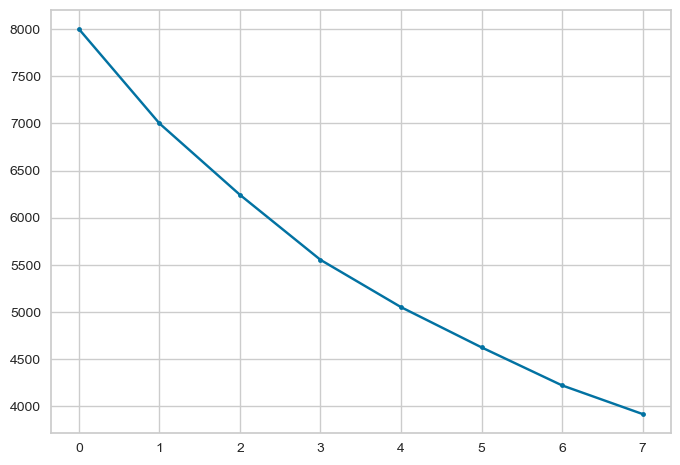

In [63]:
ks = range(3,11)
inertias = []

for k in ks: 
    model = KMeans(n_clusters=k, random_state=2023, n_init=10)
    model.fit(data)
    %time model.fit(data)
    inertias.append(model.inertia_)
    print('n_cluster:{}, inertia:{}'.format(k,model.inertia_)) 
    print('---------') 

plt.plot(inertias, marker='.')
plt.show()

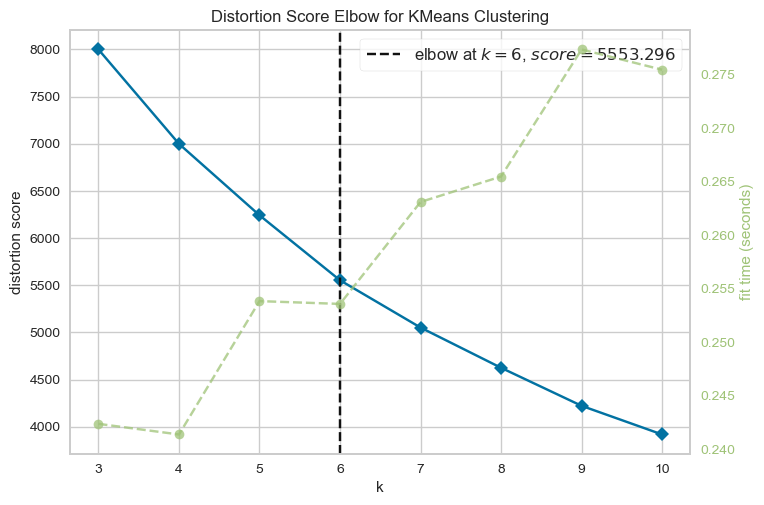

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
model_E = KMeans(random_state=2023, n_init=10)

visualizer = KElbowVisualizer(model_E,k=(3,11))

# Elbow model 학습
visualizer.fit(data)

visualizer.show()

In [65]:
data_o = pd.read_csv('customers_seg.csv', encoding='cp949')

data_o.set_index('CID', inplace=True)

data_o.head()

,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,지역,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,
1,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,도시근교,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,시골,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,도시근교,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,도시근교,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,4,계약자,고용,0,9.776436,0,기본,석사,26820200,도시근교,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


In [66]:
k = 6

model_B = KMeans(n_clusters=k, random_state=2023, n_init=10)

model_B.fit(data)
kmeans_p = model_B.predict(data)

data_d1 = pd.DataFrame(kmeans_p, index=data_o.index)
data_d1.columns = ['clust']

data_d1

,clust
CID,
1,2
2,4
3,5
4,0
5,3
...,...
11996,0
11997,0
11998,2


In [67]:
# 원본 데이터와 클러스터링 합치기

output = pd.concat([data_d1, data_o], axis=1)
output.head()

,clust,AGE,등록(계/피),고용상태,성별,Willingness to pay/Stay,갱신,상품타입,교육수준,소득,...,결혼여부,월 납입액,VOC,타 상품 보유 현황,온라인방문빈도,갱신인센티브,판매채널,총지불금액,자동차,거주지사이즈
CID,,,,,,,,,,,,,,,,,,,,,
1,2,3,피보험자,무직,1,2.616381,0,기본,대학졸업,0,...,미혼,80,0,1,자주방문,없음,자사영업,631000,일반세단,소
2,4,1,계약자,고용,0,6.352530,0,기본,고졸이하,102887400,...,미혼,80,1,4이상,비방문,포인트,인터넷,54000,일반세단,중
3,5,2,계약자,휴직,0,4.974354,0,기본,대학졸업,22159500,...,기혼,60,0,4이상,비방문,할인,자사영업,362000,일반세단,중
4,0,5,계약자,고용,1,13.480284,0,고급,고졸이하,51562500,...,기혼,110,0,2,비방문,할인,자사영업,1264000,컴팩트카,대
5,3,4,계약자,고용,0,9.776436,0,기본,석사,26820200,...,기혼,120,0,3,비방문,없음,대리점,947000,SUV,중


# Profiling

In [68]:
output.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   clust                    12000 non-null  int32  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [69]:
# Age

pro_df = pd.crosstab([output['clust']],output['AGE'],margins=True)

pro_df['1(20대)_비율'] = np.round((pro_df[1]/ pro_df['All'])*100,2)
pro_df['2(30대)_비율'] = np.round((pro_df[2]/ pro_df['All'])*100,2)
pro_df['3(40대)_비율'] = np.round((pro_df[3]/ pro_df['All'])*100,2)
pro_df['4(50대)_비율'] = np.round((pro_df[4]/ pro_df['All'])*100,2)
pro_df['5(60대)_비율'] = np.round((pro_df[5]/ pro_df['All'])*100,2)
pro_df['6(70대)_비율'] = np.round((pro_df[6]/ pro_df['All'])*100,2)

pro_df

AGE,1,2,3,4,5,6,All,1(20대)_비율,2(30대)_비율,3(40대)_비율,4(50대)_비율,5(60대)_비율,6(70대)_비율
clust,,,,,,,,,,,,,
0,709,416,673,1278,450,18,3544,20.01,11.74,18.99,36.06,12.70,0.51
1,71,80,244,275,204,29,903,7.86,8.86,27.02,30.45,22.59,3.21
2,0,508,2391,0,0,0,2899,0.00,17.52,82.48,0.00,0.00,0.00
3,199,133,346,392,85,1,1156,17.21,11.51,29.93,33.91,7.35,0.09
4,475,297,464,784,318,4,2342,20.28,12.68,19.81,33.48,13.58,0.17
5,0,104,657,395,0,0,1156,0.00,9.00,56.83,34.17,0.00,0.00
All,1454,1538,4775,3124,1057,52,12000,12.12,12.82,39.79,26.03,8.81,0.43


In [70]:
# 등록(계/피)

pro_df = pd.crosstab([output['clust']],output['등록(계/피)'],margins=True)

pro_df['계약자 비율'] = np.round((pro_df['계약자']/ pro_df['All'])*100,2)
pro_df['피보험자 비율'] = np.round((pro_df['피보험자']/ pro_df['All'])*100,2)

pro_df

등록(계/피),계약자,피보험자,All,계약자 비율,피보험자 비율
clust,,,,,
0,2797,747,3544,78.92,21.08
1,701,202,903,77.63,22.37
2,2283,616,2899,78.75,21.25
3,945,211,1156,81.75,18.25
4,1788,554,2342,76.35,23.65
5,911,245,1156,78.81,21.19
All,9425,2575,12000,78.54,21.46


In [71]:
# 성별

pro_df = pd.crosstab(output['clust'],output['성별'],margins=True)

pro_df['여성 비율'] = np.round((pro_df[0]/pro_df['All'])*100,2)
pro_df['남성 비율'] = np.round((pro_df[1]/pro_df['All'])*100,2)

pro_df

성별,0,1,All,여성 비율,남성 비율
clust,,,,,
0,1867,1677,3544,52.68,47.32
1,430,473,903,47.62,52.38
2,1433,1466,2899,49.43,50.57
3,611,545,1156,52.85,47.15
4,1208,1134,2342,51.58,48.42
5,600,556,1156,51.90,48.10
All,6149,5851,12000,51.24,48.76


In [72]:
# Willingness to pay/Stay

output[['clust','Willingness to pay/Stay']].groupby(['clust']).agg(['max','min','mean','median'])

Willingness to pay/Stay                                
                          max       min       mean     median
clust                                                        
0                     65.2125  2.465643   9.111416   5.000994
1                     92.4963  4.084800  15.947081  11.811399
2                     51.3930  2.045730   7.954856   5.871900
3                     56.6322  2.573313   8.426052   6.028410
4                     17.5269  4.802082   7.515954   6.715500
5                     48.0519  2.336439   7.974612   5.738700

In [73]:
# 상품타입

pro_df = pd.crosstab(output['clust'],output['상품타입'],margins=True)

pro_df['기본_비율'] = np.round((pro_df['기본']/pro_df['All'])*100,2)
pro_df['중급_비율'] = np.round((pro_df['중급']/pro_df['All'])*100,2)
pro_df['고급_비율'] = np.round((pro_df['고급']/pro_df['All'])*100,2)

pro_df

상품타입,고급,기본,중급,All,기본_비율,중급_비율,고급_비율
clust,,,,,,,
0,335,2155,1054,3544,60.81,29.74,9.45
1,128,498,277,903,55.15,30.68,14.17
2,234,1728,937,2899,59.61,32.32,8.07
3,85,722,349,1156,62.46,30.19,7.35
4,202,1451,689,2342,61.96,29.42,8.63
5,91,724,341,1156,62.63,29.50,7.87
All,1075,7278,3647,12000,60.65,30.39,8.96


In [74]:
# 교육수준

pro_df = pd.crosstab(output['clust'],output['교육수준'],margins=True)

pro_df['대졸이하_비율'] = np.round(((pro_df['고졸이하']+pro_df['대학졸업'])/pro_df['All'])*100,2)
pro_df['석사이상_비율'] = np.round(((pro_df['박사']+pro_df['석사'])/pro_df['All'])*100,2)

pro_df

교육수준,고졸이하,대학졸업,박사,석사,All,대졸이하_비율,석사이상_비율
clust,,,,,,,
0,1065,2479,0,0,3544,100.00,0.00
1,295,535,22,51,903,91.92,8.08
2,973,1737,66,123,2899,93.48,6.52
3,0,0,351,805,1156,0.00,100.00
4,778,1564,0,0,2342,100.00,0.00
5,366,790,0,0,1156,100.00,0.00
All,3477,7105,439,979,12000,88.18,11.82


In [75]:
# 고용상태

pro_df = pd.crosstab(output['clust'],output['고용상태'],margins=True)

pro_df['고용_비율'] = np.round((pro_df['고용']/pro_df['All'])*100,2)
pro_df['무직_비율'] = np.round((pro_df['무직']/pro_df['All'])*100,2)
pro_df['휴직_비율'] = np.round((pro_df['휴직']/pro_df['All'])*100,2)

pro_df

고용상태,FALSE,고용,무직,휴직,All,고용_비율,무직_비율,휴직_비율
clust,,,,,,,,
0,0,3544,0,0,3544,100.00,0.00,0.00
1,34,641,129,99,903,70.99,14.29,10.96
2,0,0,2899,0,2899,0.00,100.00,0.00
3,28,991,0,137,1156,85.73,0.00,11.85
4,0,2342,0,0,2342,100.00,0.00,0.00
5,298,0,0,858,1156,0.00,0.00,74.22
All,360,7518,3028,1094,12000,62.65,25.23,9.12


In [76]:
# 소득

output[['clust','소득']].groupby(['clust']).agg(['max','min','mean','median'])

소득                                    
             max       min          mean      median
clust                                               
0      131976900  24045000  6.939046e+07  68377500.0
1      132020900         0  5.153660e+07  48438000.0
2              0         0  0.000000e+00         0.0
3      131727200  12143000  6.306384e+07  60652500.0
4      131871300  24089000  6.951442e+07  68473000.0
5       39601100  12061000  2.495379e+07  25323000.0

In [77]:
# 결혼여부

pro_df = pd.crosstab(output['clust'],output['결혼여부'],margins=True)

pro_df['미혼_비율'] = np.round((pro_df['미혼']/pro_df['All'])*100,2)
pro_df['기혼_비율'] = np.round((pro_df['기혼']/pro_df['All'])*100,2)

pro_df

결혼여부,기혼,미혼,All,미혼_비율,기혼_비율
clust,,,,,
0,2375,1169,3544,32.99,67.01
1,548,355,903,39.31,60.69
2,979,1920,2899,66.23,33.77
3,747,409,1156,35.38,64.62
4,1641,701,2342,29.93,70.07
5,667,489,1156,42.30,57.70
All,6957,5043,12000,42.02,57.98


In [78]:
# 월 납입액

output[['clust','월 납입액']].groupby(['clust']).agg(['max','min','mean','median'])

월 납입액                        
        max  min        mean median
clust                              
0       230   60   91.520880   80.0
1       350  100  193.233666  210.0
2       230   60   95.170749   90.0
3       230   60   91.747405   80.0
4       230   60   91.477370   80.0
5       230   60   91.479239   80.0

In [79]:
# VOC

pro_df = pd.crosstab(output['clust'],output['VOC'],margins=True)

pro_df['0개 비율'] = np.round((pro_df[0]/pro_df['All'])*100,2)
pro_df['1개 이상 비율'] = np.round(((pro_df['All'] - pro_df[0])/pro_df['All'])*100,2)

pro_df

VOC,0,1,2,3,4,5,All,0개 비율,1개 이상 비율
clust,,,,,,,,,
0,2794,399,143,116,62,30,3544,78.84,21.16
1,721,103,45,25,6,3,903,79.84,20.16
2,2300,301,133,104,45,16,2899,79.34,20.66
3,920,132,37,38,26,3,1156,79.58,20.42
4,1852,251,94,94,38,13,2342,79.08,20.92
5,928,127,43,28,19,11,1156,80.28,19.72
All,9515,1313,495,405,196,76,12000,79.29,20.71


In [80]:
# 타 상품 보유 현황

pro_df = pd.crosstab(output['clust'],output['타 상품 보유 현황'],margins=True)

pro_df['1개 비율'] = np.round((pro_df['1']/pro_df['All'])*100,2)
pro_df['2개 비율'] = np.round((pro_df['2']/pro_df['All'])*100,2)
pro_df['3개 비율'] = np.round((pro_df['3']/pro_df['All'])*100,2)
pro_df['4개 이상 비율'] = np.round((pro_df['4이상']/pro_df['All'])*100,2)

pro_df

타 상품 보유 현황,1,2,3,4이상,All,1개 비율,2개 비율,3개 비율,4개 이상 비율
clust,,,,,,,,,
0,2054,1490,0,0,3544,57.96,42.04,0.00,0.00
1,351,235,78,239,903,38.87,26.02,8.64,26.47
2,1011,734,353,801,2899,34.87,25.32,12.18,27.63
3,446,260,162,288,1156,38.58,22.49,14.01,24.91
4,0,0,798,1544,2342,0.00,0.00,34.07,65.93
5,421,298,154,283,1156,36.42,25.78,13.32,24.48
All,4283,3017,1545,3155,12000,35.69,25.14,12.88,26.29


In [81]:
# 갱신 인센티브

pro_df = pd.crosstab(output['clust'],output['갱신인센티브'],margins=True)

pro_df['설계사독려_비율'] = np.round((pro_df['설계사독려']/pro_df['All'])*100,2)
pro_df['없음_비율'] = np.round((pro_df['없음']/pro_df['All'])*100,2)
pro_df['포인트_비율'] = np.round((pro_df['포인트']/pro_df['All'])*100,2)
pro_df['할인_비율'] = np.round((pro_df['할인']/pro_df['All'])*100,2)

pro_df

갱신인센티브,설계사독려,없음,포인트,할인,All,설계사독려_비율,없음_비율,포인트_비율,할인_비율
clust,,,,,,,,,
0,1396,509,559,1080,3544,39.39,14.36,15.77,30.47
1,271,100,144,388,903,30.01,11.07,15.95,42.97
2,675,237,441,1546,2899,23.28,8.18,15.21,53.33
3,416,149,209,382,1156,35.99,12.89,18.08,33.04
4,808,263,407,864,2342,34.50,11.23,17.38,36.89
5,299,80,131,646,1156,25.87,6.92,11.33,55.88
All,3865,1338,1891,4906,12000,32.21,11.15,15.76,40.88


In [82]:
# 총 지불 금액

output[['clust','총지불금액']].groupby(['clust']).agg(['max','min','mean','median'])

총지불금액                               
           max    min          mean    median
clust                                        
0      1765000   1000  4.145928e+05  399500.0
1      3573000      0  1.003331e+06  877000.0
2      2663000   3000  6.915157e+05  631000.0
3      1558000   1000  3.736557e+05  373500.0
4      1735000      0  4.120948e+05  400000.0
5      1560000  10000  5.622180e+05  522000.0

In [83]:
# 자동차

pro_df = pd.crosstab(output['clust'],output['자동차'],margins=True)

pro_df['SUV_비율'] = np.round((pro_df['SUV']/pro_df['All'])*100,2)
pro_df['고급차_비율'] = np.round((pro_df['고급차']/pro_df['All'])*100,2)
pro_df['스포츠카_비율'] = np.round((pro_df['스포츠카']/pro_df['All'])*100,2)
pro_df['일반세단_비율'] = np.round((pro_df['일반세단']/pro_df['All'])*100,2)
pro_df['컴팩트카_비율'] = np.round((pro_df['컴팩트카']/pro_df['All'])*100,2)

pro_df

자동차,SUV,고급차,스포츠카,일반세단,컴팩트카,All,SUV_비율,고급차_비율,스포츠카_비율,일반세단_비율,컴팩트카_비율
clust,,,,,,,,,,,
0,731,0,0,1947,866,3544,20.63,0.00,0.00,54.94,24.44
1,0,454,449,0,0,903,0.00,50.28,49.72,0.00,0.00
2,637,0,164,1503,595,2899,21.97,0.00,5.66,51.85,20.52
3,217,0,39,623,277,1156,18.77,0.00,3.37,53.89,23.96
4,489,0,0,1359,494,2342,20.88,0.00,0.00,58.03,21.09
5,262,0,0,642,252,1156,22.66,0.00,0.00,55.54,21.80
All,2336,454,652,6074,2484,12000,19.47,3.78,5.43,50.62,20.70


In [84]:
# 거주지 사이즈

pro_df = pd.crosstab(output['clust'],output['거주지사이즈'],margins=True)

pro_df['대_비율'] = np.round((pro_df['대']/pro_df['All'])*100,2)
pro_df['중_비율'] = np.round((pro_df['중']/pro_df['All'])*100,2)
pro_df['소_비율'] = np.round((pro_df['소']/pro_df['All'])*100,2)

pro_df

거주지사이즈,대,소,중,All,대_비율,중_비율,소_비율
clust,,,,,,,
0,322,658,2564,3544,9.09,72.35,18.57
1,98,176,629,903,10.85,69.66,19.49
2,328,565,2006,2899,11.31,69.20,19.49
3,128,231,797,1156,11.07,68.94,19.98
4,229,470,1643,2342,9.78,70.15,20.07
5,140,232,784,1156,12.11,67.82,20.07
All,1245,2332,8423,12000,10.38,70.19,19.43


In [85]:
# 갱신

pro_df = pd.crosstab(output['clust'],output['갱신'],margins=True)

pro_df['비갱신_비율'] = np.round((pro_df[0]/pro_df['All'])*100,2)
pro_df['갱신_비율'] = np.round((pro_df[1]/pro_df['All'])*100,2)

pro_df

갱신,0,1,All,비갱신_비율,갱신_비율
clust,,,,,
0,3062,482,3544,86.40,13.60
1,764,139,903,84.61,15.39
2,2624,275,2899,90.51,9.49
3,966,190,1156,83.56,16.44
4,2073,269,2342,88.51,11.49
5,795,361,1156,68.77,31.23
All,10284,1716,12000,85.70,14.30


In [86]:
# 지역

pro_df = pd.crosstab(output['clust'],output['지역'],margins=True)

pro_df['도시근교_비율'] = np.round((pro_df['도시근교']/pro_df['All'])*100,2)
pro_df['도심_비율'] = np.round((pro_df['도심']/pro_df['All'])*100,2)
pro_df['시골_비율'] = np.round((pro_df['시골']/pro_df['All'])*100,2)

pro_df

지역,도시근교,도심,시골,All,도시근교_비율,도심_비율,시골_비율
clust,,,,,,,
0,1716,877,951,3544,48.42,24.75,26.83
1,604,134,165,903,66.89,14.84,18.27
2,2641,116,142,2899,91.10,4.00,4.90
3,445,300,411,1156,38.49,25.95,35.55
4,1125,596,621,2342,48.04,25.45,26.52
5,1041,61,54,1156,90.05,5.28,4.67
All,7572,2084,2344,12000,63.10,17.37,19.53


In [87]:
# 온라인 방문 빈도

pro_df = pd.crosstab(output['clust'],output['온라인방문빈도'],margins=True)

pro_df['비방문_비율'] = np.round((pro_df['비방문']/pro_df['All'])*100,2)
pro_df['자주방문_비율'] = np.round((pro_df['자주방문']/pro_df['All'])*100,2)
pro_df['종종_비율'] = np.round((pro_df['종종']/pro_df['All'])*100,2)

pro_df

온라인방문빈도,비방문,자주방문,종종,All,비방문_비율,자주방문_비율,종종_비율
clust,,,,,,,
0,2649,747,148,3544,74.75,21.08,4.18
1,662,202,39,903,73.31,22.37,4.32
2,2165,616,118,2899,74.68,21.25,4.07
3,899,211,46,1156,77.77,18.25,3.98
4,1694,554,94,2342,72.33,23.65,4.01
5,859,245,52,1156,74.31,21.19,4.50
All,8928,2575,497,12000,74.40,21.46,4.14


In [88]:
# 판매 채널

pro_df = pd.crosstab(output['clust'],output['판매채널'],margins=True)

pro_df['대리점_비율'] = np.round((pro_df['대리점']/pro_df['All'])*100,2)
pro_df['인터넷_비율'] = np.round((pro_df['인터넷']/pro_df['All'])*100,2)
pro_df['자사영업_비율'] = np.round((pro_df['자사영업']/pro_df['All'])*100,2)
pro_df['콜센터_비율'] = np.round((pro_df['콜센터']/pro_df['All'])*100,2)

pro_df

판매채널,대리점,인터넷,자사영업,콜센터,All,대리점_비율,인터넷_비율,자사영업_비율,콜센터_비율
clust,,,,,,,,,
0,1361,515,1001,667,3544,38.40,14.53,28.24,18.82
1,362,138,248,155,903,40.09,15.28,27.46,17.17
2,1149,405,797,548,2899,39.63,13.97,27.49,18.90
3,427,159,341,229,1156,36.94,13.75,29.50,19.81
4,846,335,651,510,2342,36.12,14.30,27.80,21.78
5,447,188,311,210,1156,38.67,16.26,26.90,18.17
All,4592,1740,3349,2319,12000,38.27,14.50,27.91,19.32


# Visualization

In [89]:
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False}, style='white')

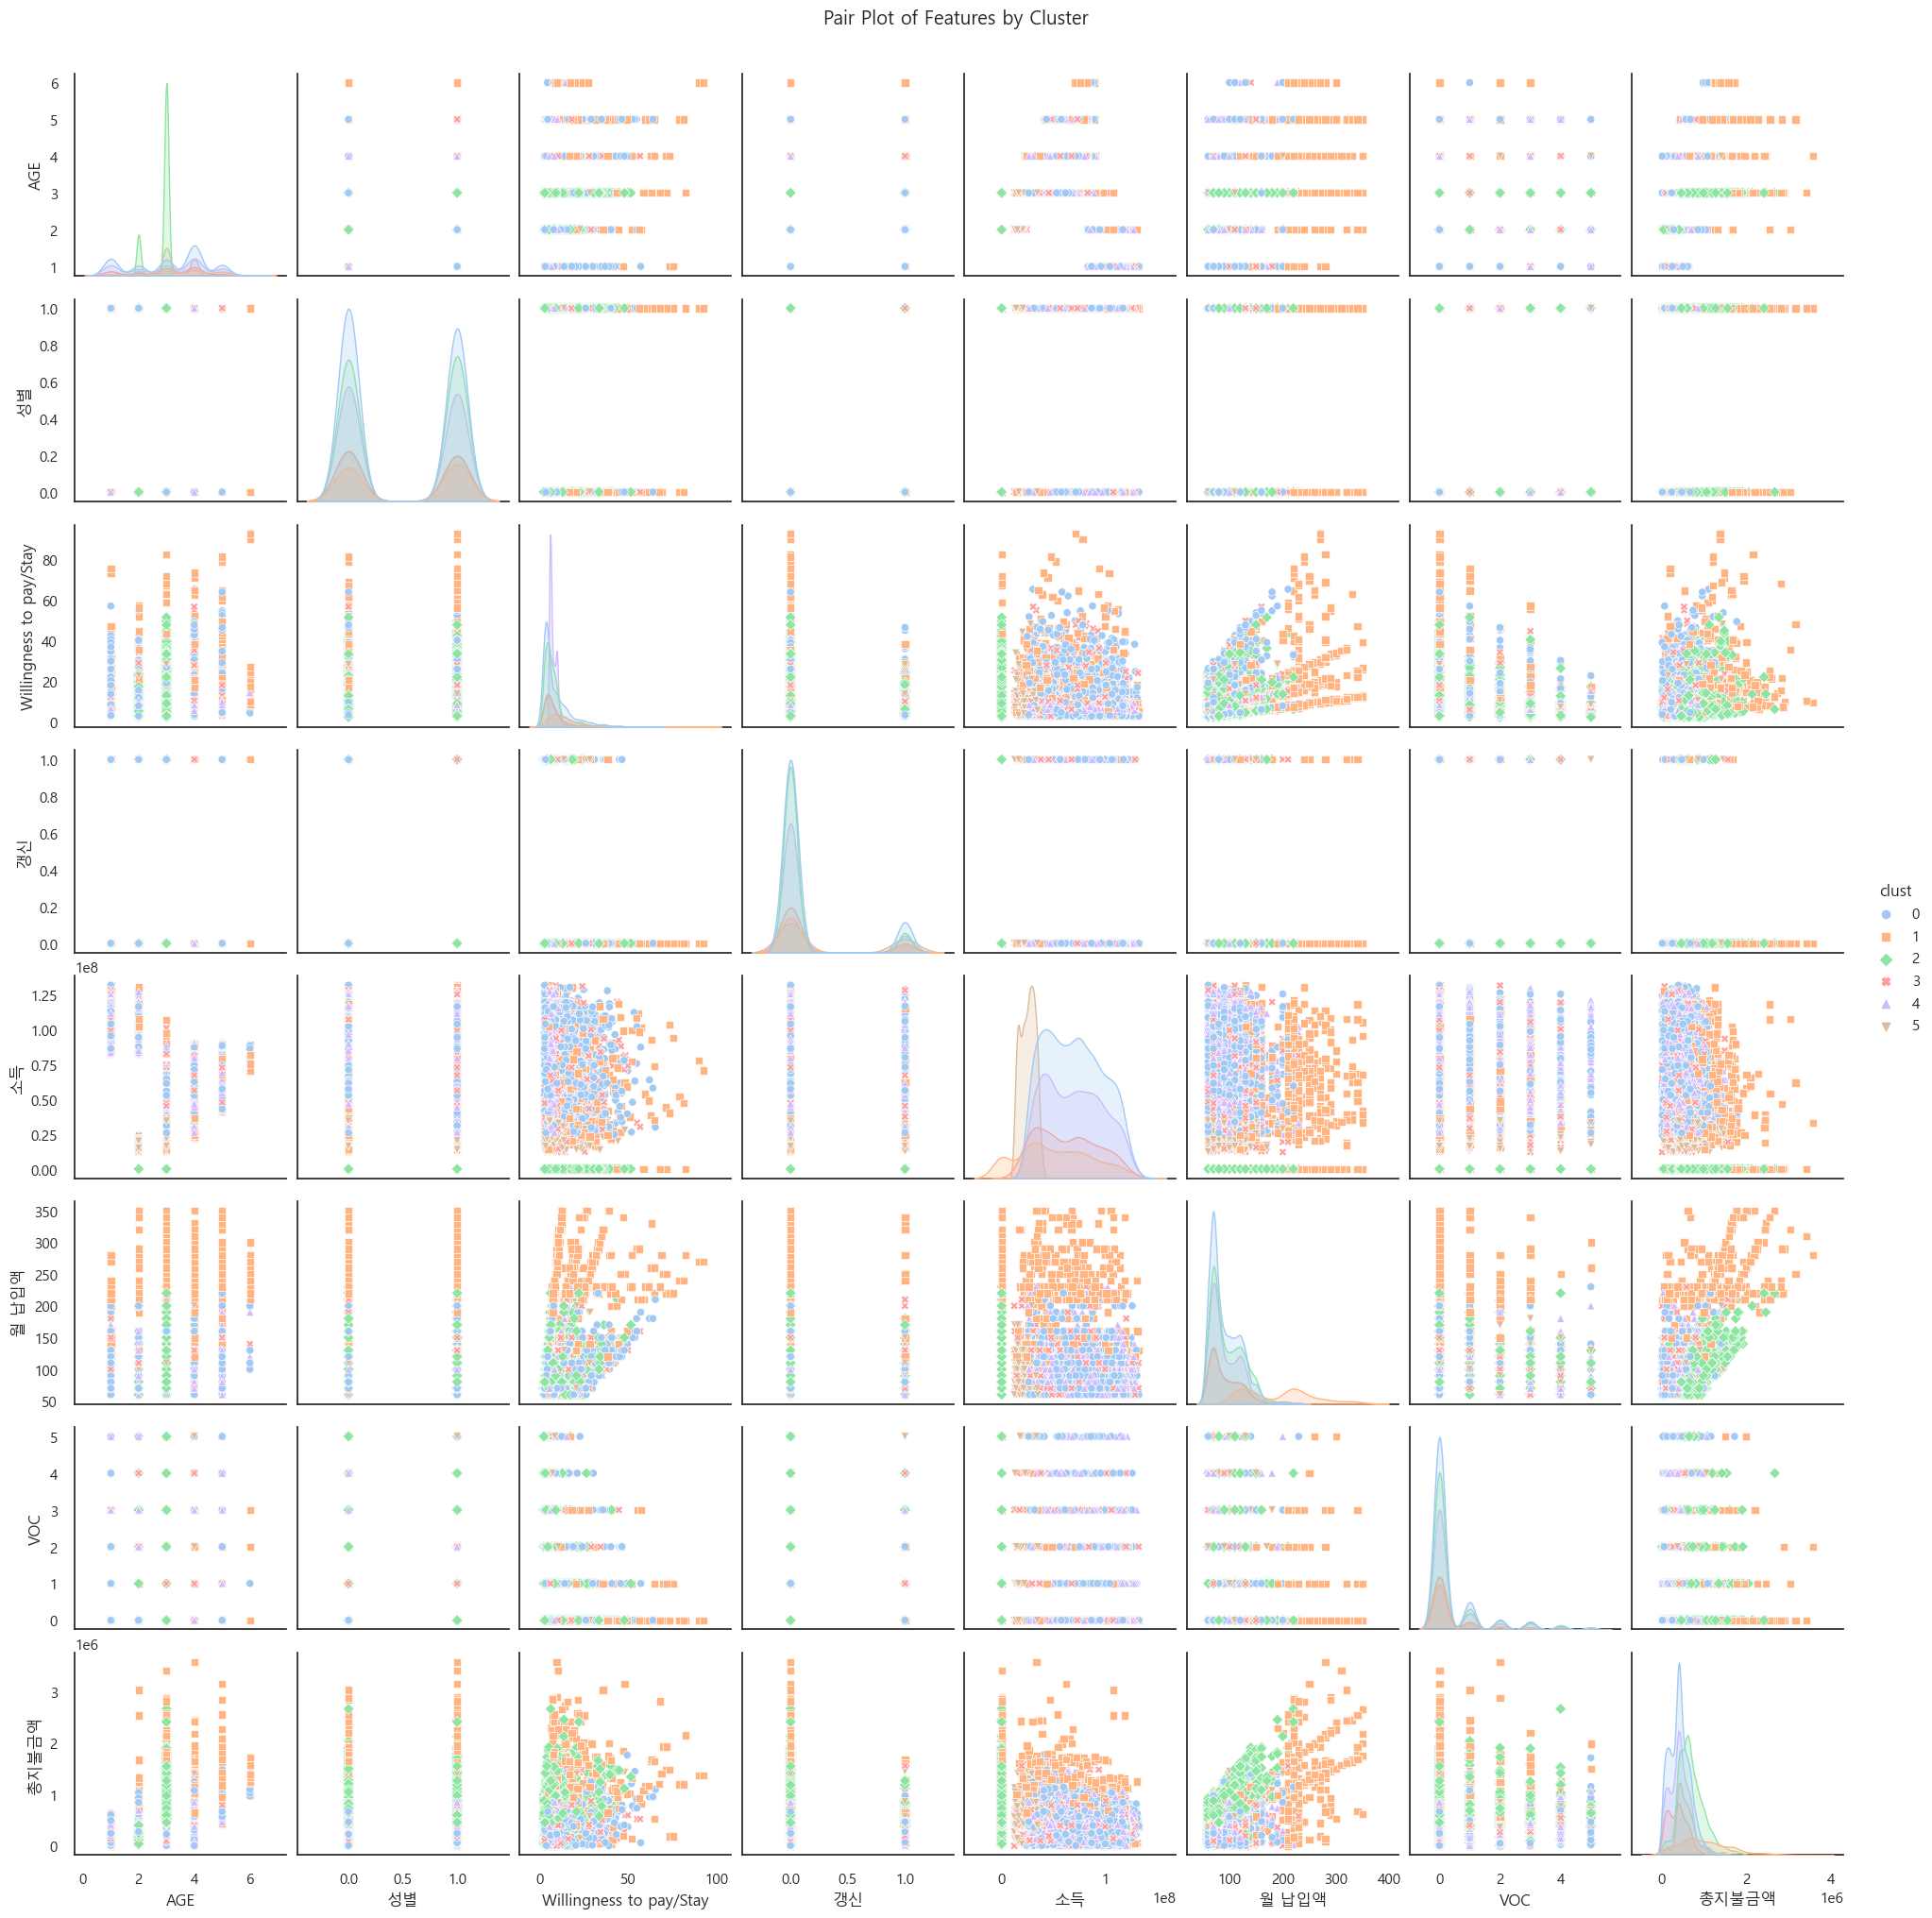

In [90]:
sns.pairplot(output, hue='clust', diag_kind='kde', markers=["o", "s", "D", "X", "^", "v"], palette='pastel')
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
plt.show()

C:\Users\yooji\AppData\Local\Temp\ipykernel_24644\62497094.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(output[output['clust'] == clust]['소득'],


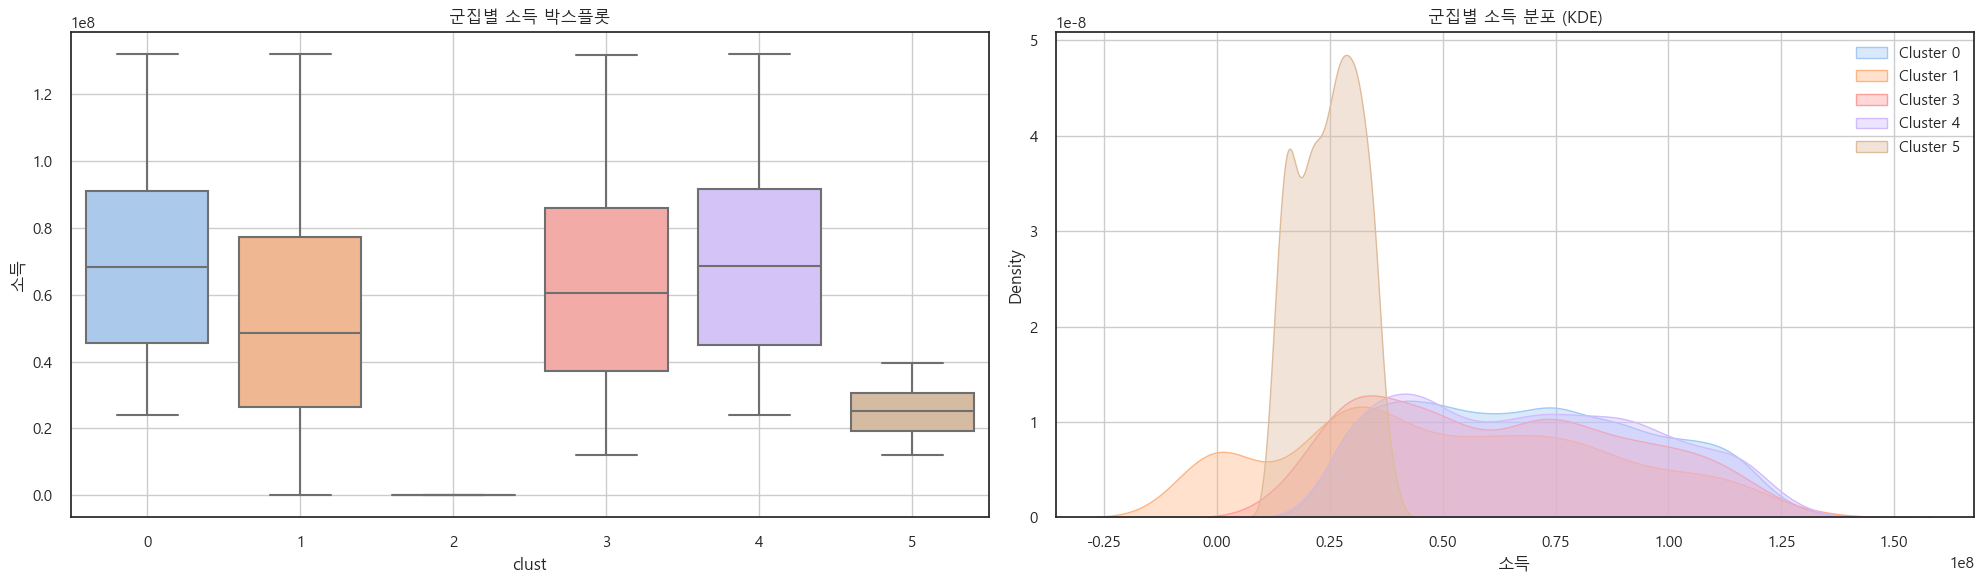

In [91]:
plt.figure(figsize=(20, 6))

# 첫 번째 서브플롯: 박스플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='clust', y='소득', data=output, palette='pastel')
plt.title('군집별 소득 박스플롯')
plt.grid()

# 두 번째 서브플롯: KDE 플롯
plt.subplot(1, 2, 2)
colors = sns.color_palette("pastel", n_colors=len(output['clust'].unique())) 
for i, clust in enumerate(sorted(output['clust'].unique())):  # 클러스터 오름차순 정렬
    sns.kdeplot(output[output['clust'] == clust]['소득'], 
                label=f'Cluster {clust}', 
                fill=True, 
                alpha=0.4, 
                color=colors[i]) 
    
plt.xlabel('소득')
plt.ylabel('Density')
plt.title('군집별 소득 분포 (KDE)')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

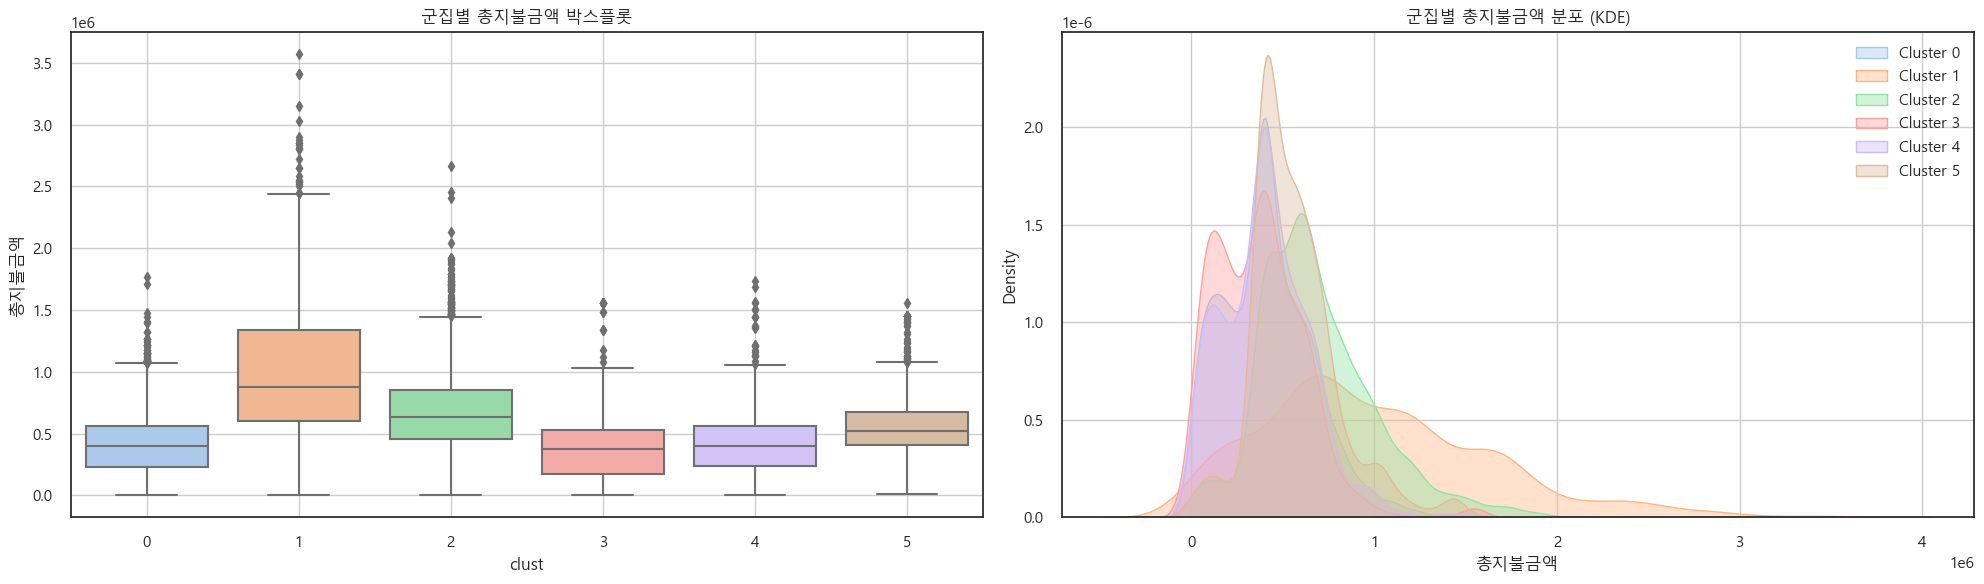

In [92]:
plt.figure(figsize=(20, 6))

# 첫 번째 서브플롯: 박스플롯
plt.subplot(1, 2, 1)
sns.boxplot(x='clust', y='총지불금액', data=output, palette='pastel')
plt.title('군집별 총지불금액 박스플롯')
plt.grid()

# 두 번째 서브플롯: KDE 플롯
plt.subplot(1, 2, 2)
colors = sns.color_palette("pastel", n_colors=len(output['clust'].unique())) 
for i, clust in enumerate(sorted(output['clust'].unique())):  # 클러스터 오름차순 정렬
    sns.kdeplot(output[output['clust'] == clust]['총지불금액'], 
                label=f'Cluster {clust}', 
                fill=True, 
                alpha=0.4, 
                color=colors[i])

# 그래프 설정
plt.xlabel('총지불금액')
plt.ylabel('Density')
plt.title('군집별 총지불금액 분포 (KDE)')
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()

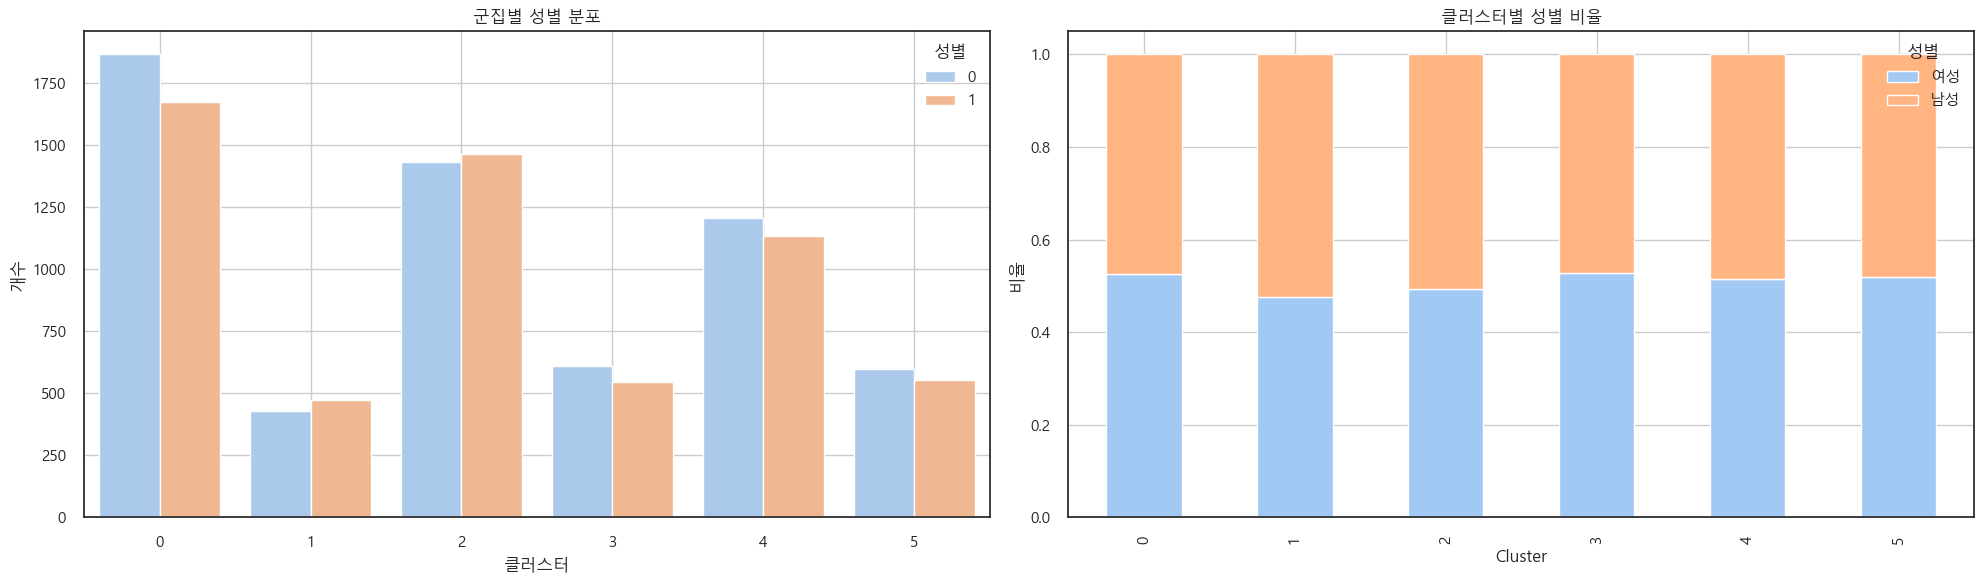

In [93]:
plt.figure(figsize=(20, 6))

# 첫 번째 서브플롯: 군집별 성별 분포 (Countplot)
plt.subplot(1, 2, 1)
sns.countplot(x='clust', hue='성별', data=output, palette='pastel')
plt.title('군집별 성별 분포')
plt.xlabel('클러스터')
plt.ylabel('개수')
plt.legend(title='성별')
plt.grid()

# 두 번째 서브플롯: 군집별 성별 비율
plt.subplot(1, 2, 2)
# 성별 비율 계산
gender_ratio = output.groupby(['clust', '성별']).size().unstack(fill_value=0)
gender_ratio_percentage = gender_ratio.div(gender_ratio.sum(axis=1), axis=0)

gender_ratio_percentage.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"), ax=plt.gca())
plt.title('클러스터별 성별 비율')
plt.xlabel('Cluster')
plt.ylabel('비율')
plt.legend(title='성별', labels=['여성', '남성'])
plt.tight_layout()
plt.grid()
plt.show()

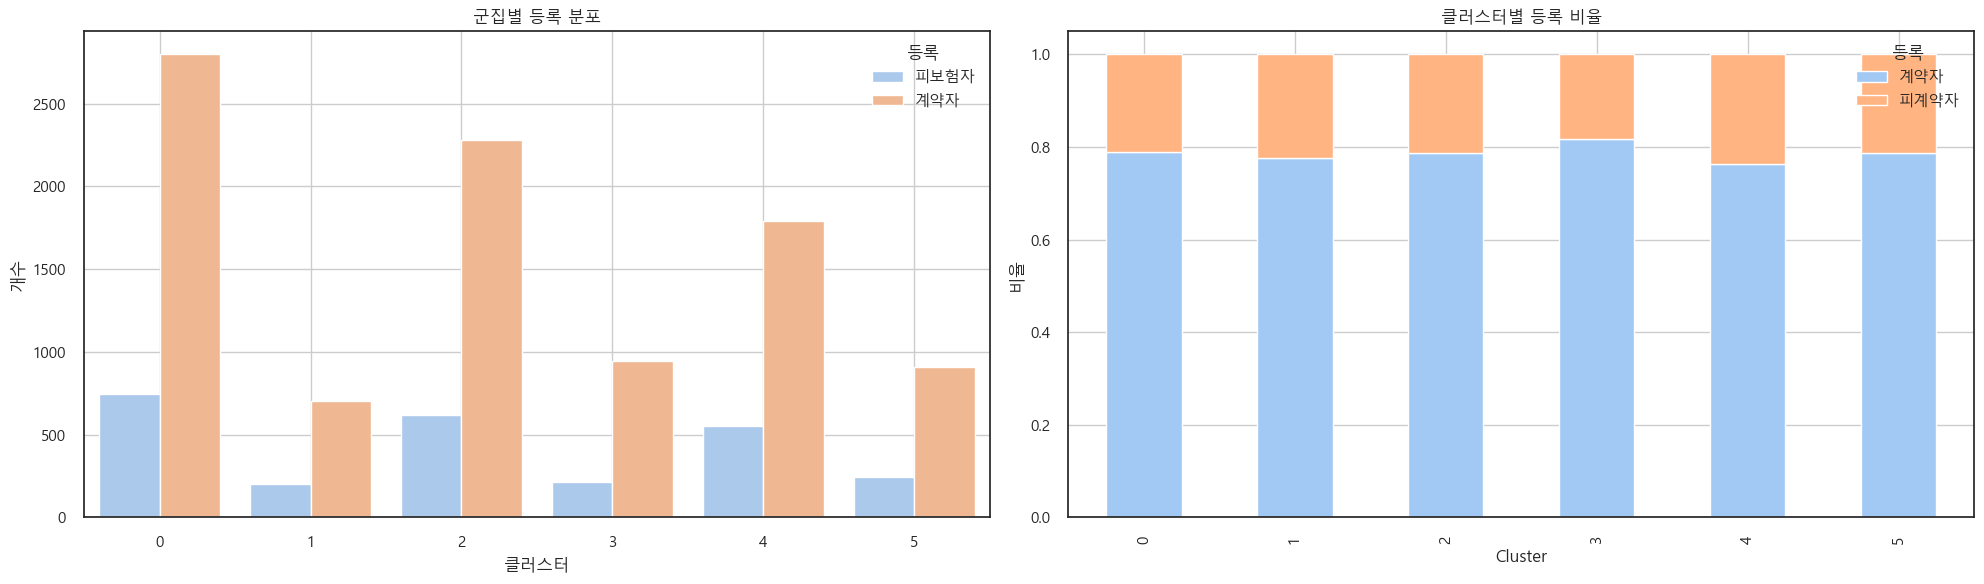

In [94]:
plt.figure(figsize=(20, 6))

# 첫 번째 서브플롯: 군집별 등록 분포 (Countplot)
plt.subplot(1, 2, 1)
sns.countplot(x='clust', hue='등록(계/피)', data=output, palette='pastel')
plt.title('군집별 등록 분포')
plt.xlabel('클러스터')
plt.ylabel('개수')
plt.legend(title='등록')
plt.grid()

# 두 번째 서브플롯: 군집별 등록 비율
plt.subplot(1, 2, 2)
# 등록 비율 계산
ratio = output.groupby(['clust', '등록(계/피)']).size().unstack(fill_value=0)
ratio_percentage = ratio.div(ratio.sum(axis=1), axis=0)

ratio_percentage.plot(kind='bar', stacked=True, color=sns.color_palette("pastel"), ax=plt.gca())
plt.title('클러스터별 등록 비율')
plt.xlabel('Cluster')
plt.ylabel('비율')
plt.legend(title='등록', labels=['계약자', '피계약자'])
plt.tight_layout()
plt.grid()
plt.show()

In [95]:
employment_counts = pd.crosstab(output['고용상태'],columns='count', normalize=True)*100
employment_counts

col_0,count
고용상태,
FALSE,3.000000
고용,62.650000
무직,25.233333
휴직,9.116667


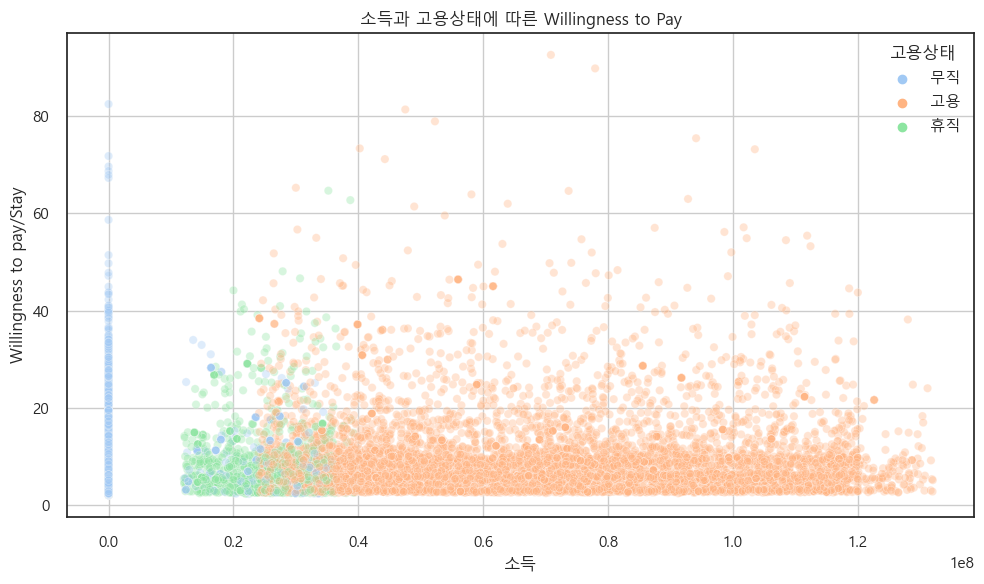

In [96]:
output.loc[output['고용상태'].isin(['FALSE']), '고용상태']='무직'

plt.figure(figsize=(10, 6))

sns.scatterplot(x='소득', y='Willingness to pay/Stay', hue='고용상태', data=output, palette='pastel', alpha=0.35)

plt.title('소득과 고용상태에 따른 Willingness to Pay')
plt.xlabel('소득')
plt.ylabel('Willingness to pay/Stay')
plt.legend(title='고용상태')
plt.tight_layout()
plt.grid()
plt.show()

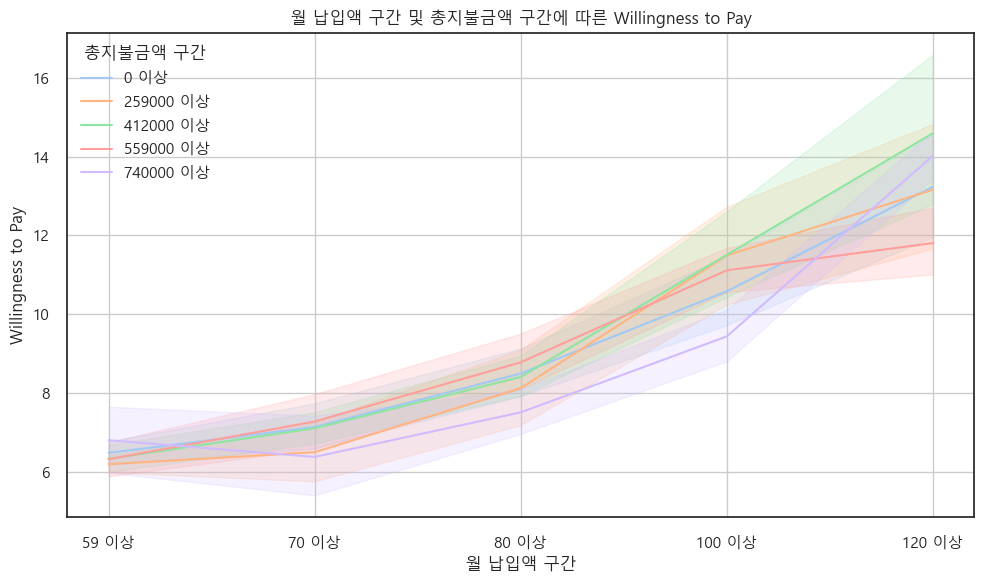

In [97]:
# 데이터의 각 feature를 qcut으로 구간화 (중복 경계 값 제거)
# 최소값과 최대값을 기준으로 구간 생성
output['납입액 구간'] = pd.qcut(output['월 납입액'], q=5, duplicates='drop')
output['총지불금액 구간'] = pd.qcut(output['총지불금액'], q=5, duplicates='drop')

# 각 구간의 레이블을 명확하게 수정
output['납입액 구간'] = output['납입액 구간'].apply(lambda x: f"{int(x.left)} 이상")
output['총지불금액 구간'] = output['총지불금액 구간'].apply(lambda x: f"{int(x.left)} 이상")

plt.figure(figsize=(10, 6))
sns.lineplot(data=output, x='납입액 구간', y='Willingness to pay/Stay', hue='총지불금액 구간', palette='pastel')

plt.title('월 납입액 구간 및 총지불금액 구간에 따른 Willingness to Pay')
plt.xlabel('월 납입액 구간')
plt.ylabel('Willingness to Pay')
plt.legend(title='총지불금액 구간', loc='upper left')
plt.tight_layout()
plt.grid()
plt.show()